# CS 3540 Final Project - Classifying human emotion in audio clips.
Nathan Blanchard, Skyler Heininger, Eric Seligmann, Henry Kraessig

## Google Colab Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540 Final Project/Notebooks'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['extract_filename_features.py', 'extract_audio_features.py', 'data', 'normalize_data.py', 'project_proposal.ipynb']


## Import Statements

In [25]:
# load needed libraries.
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

## Prepare the Data
Load the features from drive and split into training and testing sets for predicting emotion and intensity separately

In [26]:
# Load the data
data = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, "data", "normalized_features.csv"))
features = data.iloc[:, :len(data.columns) - 2]
emotion_labels = data["target"]
intensity_labels = data["intensity"]


In [27]:
# Split the data into training and testing sets
X_train_emo, X_test_emo, y_train_emo, y_test_emo = train_test_split(features, emotion_labels, test_size=0.2, random_state=42)
X_train_in, X_test_in, y_train_in, y_test_in = train_test_split(features, intensity_labels, test_size=0.2, random_state=42)

## Decision Tree Classifiers



In [61]:
# Create a decision tree classifier
dtree_emo = DecisionTreeClassifier()
dtree_in = DecisionTreeClassifier()

# Train the classifier on the training data
dtree_emo.fit(X_train_emo, y_train_emo)
dtree_in.fit(X_train_in, y_train_in)

# Extract feature importance
dtree_feature_importance_emo = dtree_emo.feature_importances_
dtree_feature_importance_in = dtree_in.feature_importances_

# Predict
y_pred_emo = dtree_emo.predict(X_test_emo)
y_pred_in = dtree_in.predict(X_test_in)

# Get the accuracies
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
print("Accuracy:", accuracy_emo)
accuracy_in = accuracy_score(y_test_in, y_pred_in)
print("Accuracy:", accuracy_in)

Accuracy: 0.3724696356275304
Accuracy: 0.7044534412955465


Visualize the feature importances from the decision trees

In [29]:
# Visualize feature importance
#plt.figure(figsize=(10, 6))
#plt.barh(features.columns, dtree_feature_importance_emo)
#plt.xlabel('Feature Importance')
#plt.ylabel('Features')
#plt.title('Decision Tree Feature Importance')
#plt.show()

#plt.figure(figsize=(10, 6))
#plt.barh(features.columns, dtree_feature_importance_in)
#plt.xlabel('Feature Importance')
#plt.ylabel('Features')
#plt.title('Decision Tree Feature Importance')
#plt.show()

Let's try some values for the hyperparameter max_features:
Loop iterating though all possible values for the hyperparameter max_features, creating a tree with max_features = i for each value within the loop, and then displaying a graph that plots the scores for each value i.

In [30]:
# Test out max_features hyperparameter for emotion
scores_emo = []
for i in range(1, X_train_emo.shape[1]):
    dtree = DecisionTreeClassifier(max_features=i).fit(X_train_emo, y_train_emo)
    scores_emo.append(dtree.score(X_test_emo, y_test_emo))

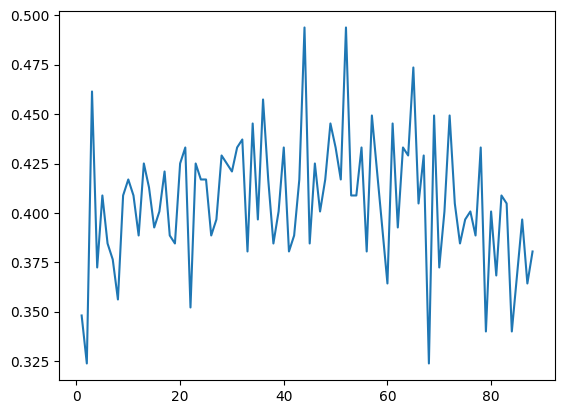

In [31]:
# Plot the scores of each value tried for max_features
x_vals_emo = [i for i in range(1, X_train_emo.shape[1])]
plt.plot(x_vals_emo, scores_emo)

In [32]:
# Test out max_features hyperparameter for intensity
scores_in = []
for i in range(1, X_train_in.shape[1]):
    dtree = DecisionTreeClassifier(max_features=i).fit(X_train_in, y_train_in)
    scores_in.append(dtree.score(X_test_in, y_test_in))

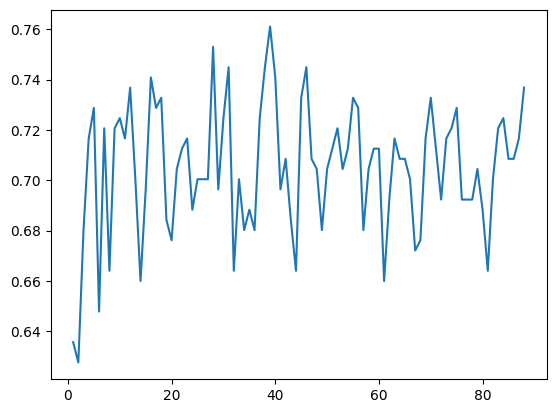

In [33]:
# Plot the scores of each value tried for max_features
x_vals_in = [i for i in range(1, X_train_in.shape[1])]
plt.plot(x_vals_in, scores_in)

### Confusion Matrix and Precision Recall
Create confusion matricies and calculate precision and recall for the decision tree classifiers

In [34]:
# implement your own code to calacuate precision and recall
def custom_precision_recall(conf_matrix, target_names):
    # write your code here
    pr_df = pd.DataFrame(columns=['Precision', 'Recall'])
    for target in target_names:
        tp = conf_matrix[target][target]
        fp = np.sum(conf_matrix[:, target])-tp
        fn = np.sum(conf_matrix[target])-tp
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        pr_df.loc[len(pr_df)] = [precision, recall]
    return pr_df

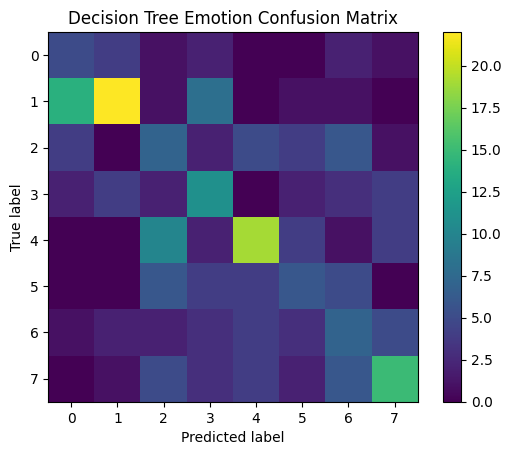

In [62]:
# Create confusion matrix for emotion
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)
plt.imshow(conf_matrix_emo)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Emotion Confusion Matrix')
plt.colorbar()
plt.show()

In [36]:
# Calculate precision and recall for emotion
custom_precision_recall(conf_matrix_emo, np.arange(8))

,Precision,Recall
0,0.200000,0.333333
1,0.638889,0.489362
2,0.250000,0.275862
3,0.305556,0.392857
4,0.527778,0.475000
5,0.285714,0.240000
6,0.250000,0.259259
7,0.484848,0.444444


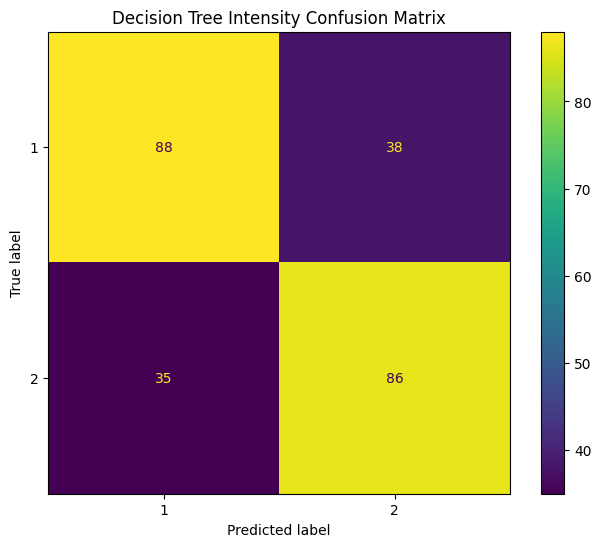

In [63]:
# Create confusion matrix for intensity
conf_matrix_in = confusion_matrix(y_test_in, y_pred_in)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_in, display_labels=dtree_in.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

ax.set_title('Decision Tree Intensity Confusion Matrix')

plt.show()

In [38]:
# Calculate precision and recall for intensity
custom_precision_recall(conf_matrix_in, np.arange(2))

,Precision,Recall
0,0.709924,0.738095
1,0.715517,0.685950


## Random Forest Classifiers


In [67]:
# Create a random forest classifier
rfc_emo = RandomForestClassifier()
rfc_in = RandomForestClassifier()

# Train the classifier on the training data
rfc_emo.fit(X_train_emo, y_train_emo)
rfc_in.fit(X_train_in, y_train_in)

# Extract feature importance
rfc_feature_importance_emo = rfc_emo.feature_importances_
rfc_feature_importance_in = rfc_in.feature_importances_

# Predict
y_pred_emo = rfc_emo.predict(X_test_emo)
y_pred_in = rfc_in.predict(X_test_in)

# Get the accuracies
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
print("Accuracy:", accuracy_emo)
accuracy_in = accuracy_score(y_test_in, y_pred_in)
print("Accuracy:", accuracy_in)

Accuracy: 0.6234817813765182
Accuracy: 0.7651821862348178


Visualize the feature importances from the random forests

In [68]:
# Visualize feature importance
#plt.figure(figsize=(10, 6))
#plt.barh(features.columns, rfc_feature_importance_emo)
#plt.xlabel('Feature Importance')
#plt.ylabel('Features')
#plt.title('Random Forest Emotion Feature Importance')
#plt.show()

#plt.figure(figsize=(10, 6))
#plt.barh(features.columns, rfc_feature_importance_in)
#plt.xlabel('Feature Importance')
#plt.ylabel('Features')
#plt.title('Random Forest Intensity Feature Importance')
#plt.show()

Let's try some values for the hyperparameter max_features:
Loop iterating though all possible values for the hyperparameter max_features, creating a tree with max_features = i for each value within the loop, and then displaying a graph that plots the scores for each value i.

In [69]:
# Test out max_features hyperparameter for emotion
scores_emo = []
for i in range(10, 301, 10):
    rforest = RandomForestClassifier(n_estimators=i).fit(X_train_emo, y_train_emo)
    scores_emo.append(rforest.score(X_test_emo, y_test_emo))

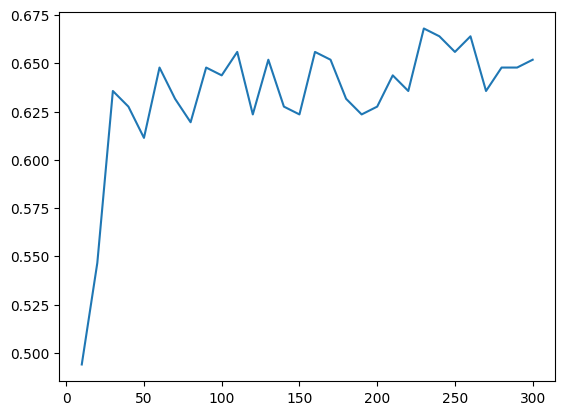

In [70]:
# Plot the scores of each value tried for max_features
x_vals_emo = [i for i in range(10, 301, 10)]
plt.plot(x_vals_emo, scores_emo)

In [71]:
# Test out max_features hyperparameter for intensity
scores_in = []
for i in range(10, 301, 10):
    rforest = RandomForestClassifier(n_estimators=i).fit(X_train_in, y_train_in)
    scores_in.append(rforest.score(X_test_in, y_test_in))

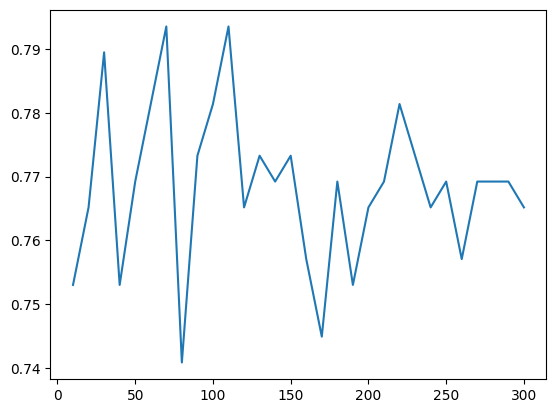

In [72]:
# Plot the scores of each value tried for max_features
x_vals_in = [i for i in range(10, 301, 10)]
plt.plot(x_vals_in, scores_in)

In [80]:
# Train new models that use n_estimators=100
# Create a random forest classifier
rfc_emo = RandomForestClassifier(n_estimators=100)
rfc_in = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rfc_emo.fit(X_train_emo, y_train_emo)
rfc_in.fit(X_train_in, y_train_in)

# Predict
y_pred_emo = rfc_emo.predict(X_test_emo)
y_pred_in = rfc_in.predict(X_test_in)

# Get the accuracies
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
print("Accuracy:", accuracy_emo)
accuracy_in = accuracy_score(y_test_in, y_pred_in)
print("Accuracy:", accuracy_in)

Accuracy: 0.6518218623481782
Accuracy: 0.7611336032388664


### Confusion Matrix and Precision Recall
Create confusion matricies and calculate precision and recall for the decision tree classifiers

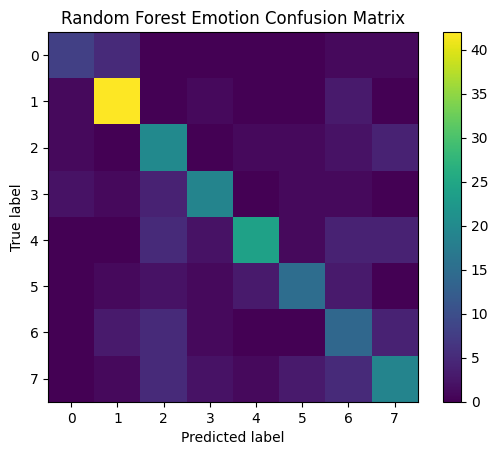

In [81]:
# Create confusion matrix for emotion
conf_matrix_emo = confusion_matrix(y_test_emo, y_pred_emo)
plt.imshow(conf_matrix_emo)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Random Forest Emotion Confusion Matrix')
plt.colorbar()
plt.show()

In [82]:
# Calculate precision and recall for emotion
custom_precision_recall(conf_matrix_emo, np.arange(8))

,Precision,Recall
0,0.666667,0.533333
1,0.792453,0.893617
2,0.487805,0.689655
3,0.730769,0.678571
4,0.827586,0.600000
5,0.714286,0.600000
6,0.424242,0.518519
7,0.593750,0.527778


[]

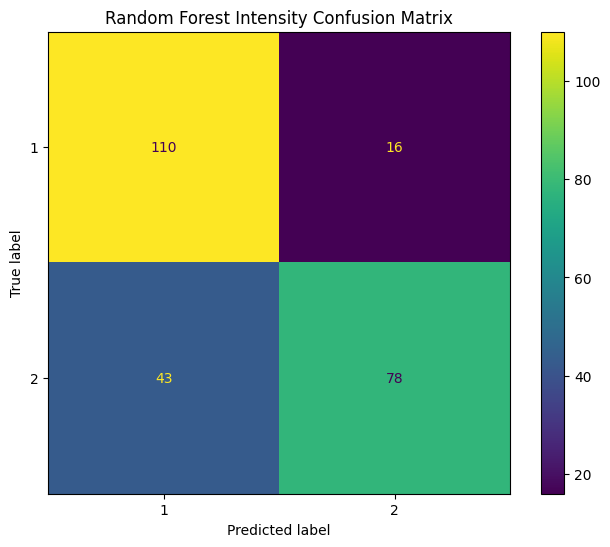

In [83]:
# Create confusion matrix for intensity
conf_matrix_in = confusion_matrix(y_test_in, y_pred_in)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_in, display_labels=rfc_in.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)

ax.set_title('Random Forest Intensity Confusion Matrix')
plt.plot()

In [84]:
# Calculate precision and recall for intensity
custom_precision_recall(conf_matrix_in, np.arange(2))

,Precision,Recall
0,0.718954,0.873016
1,0.829787,0.644628


## SVM Classifiers


In [85]:
# Create an svm classifier
svc_emo = SVC().fit(X_train_emo, y_train_emo)
svc_in = SVC().fit(X_train_in, y_train_in)

# Predict
y_pred_emo = svc_emo.predict(X_test_emo)
y_pred_in = svc_in.predict(X_test_in)

# Get the accuracies
accuracy_emo = accuracy_score(y_test_emo, y_pred_emo)
print("Accuracy:", accuracy_emo)
accuracy_in = accuracy_score(y_test_in, y_pred_in)
print("Accuracy:", accuracy_in)

Accuracy: 0.08502024291497975
Accuracy: 0.5101214574898786
